## Waste Management using CNN Model

In [7]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [4]:
train_path = "D:\Waste Management\Week-1\dataset\TRAIN"
test_path = "D:\Waste Management\Week-1\dataset\TEST"

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [10]:
# Visualization
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+ "/*"):
    for file in tqdm(glob(category+ "/*")):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])
data = pd.DataFrame({"image": x_data, "label": y_data})

100%|██████████| 9999/9999 [01:26<00:00, 115.42it/s]


In [8]:
data.shape

(22564, 2)

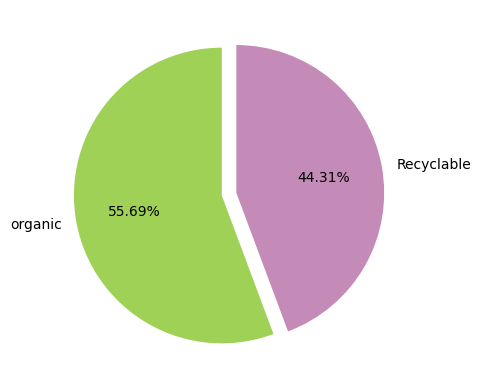

In [9]:
colors = ["#a0d157", "#c48bb8"]
plt.pie(data.label.value_counts(), labels = ["organic", "Recyclable"], autopct = "%0.2f%%", colors = colors, startangle= 90, explode=[0.05, 0.05])
plt.show()

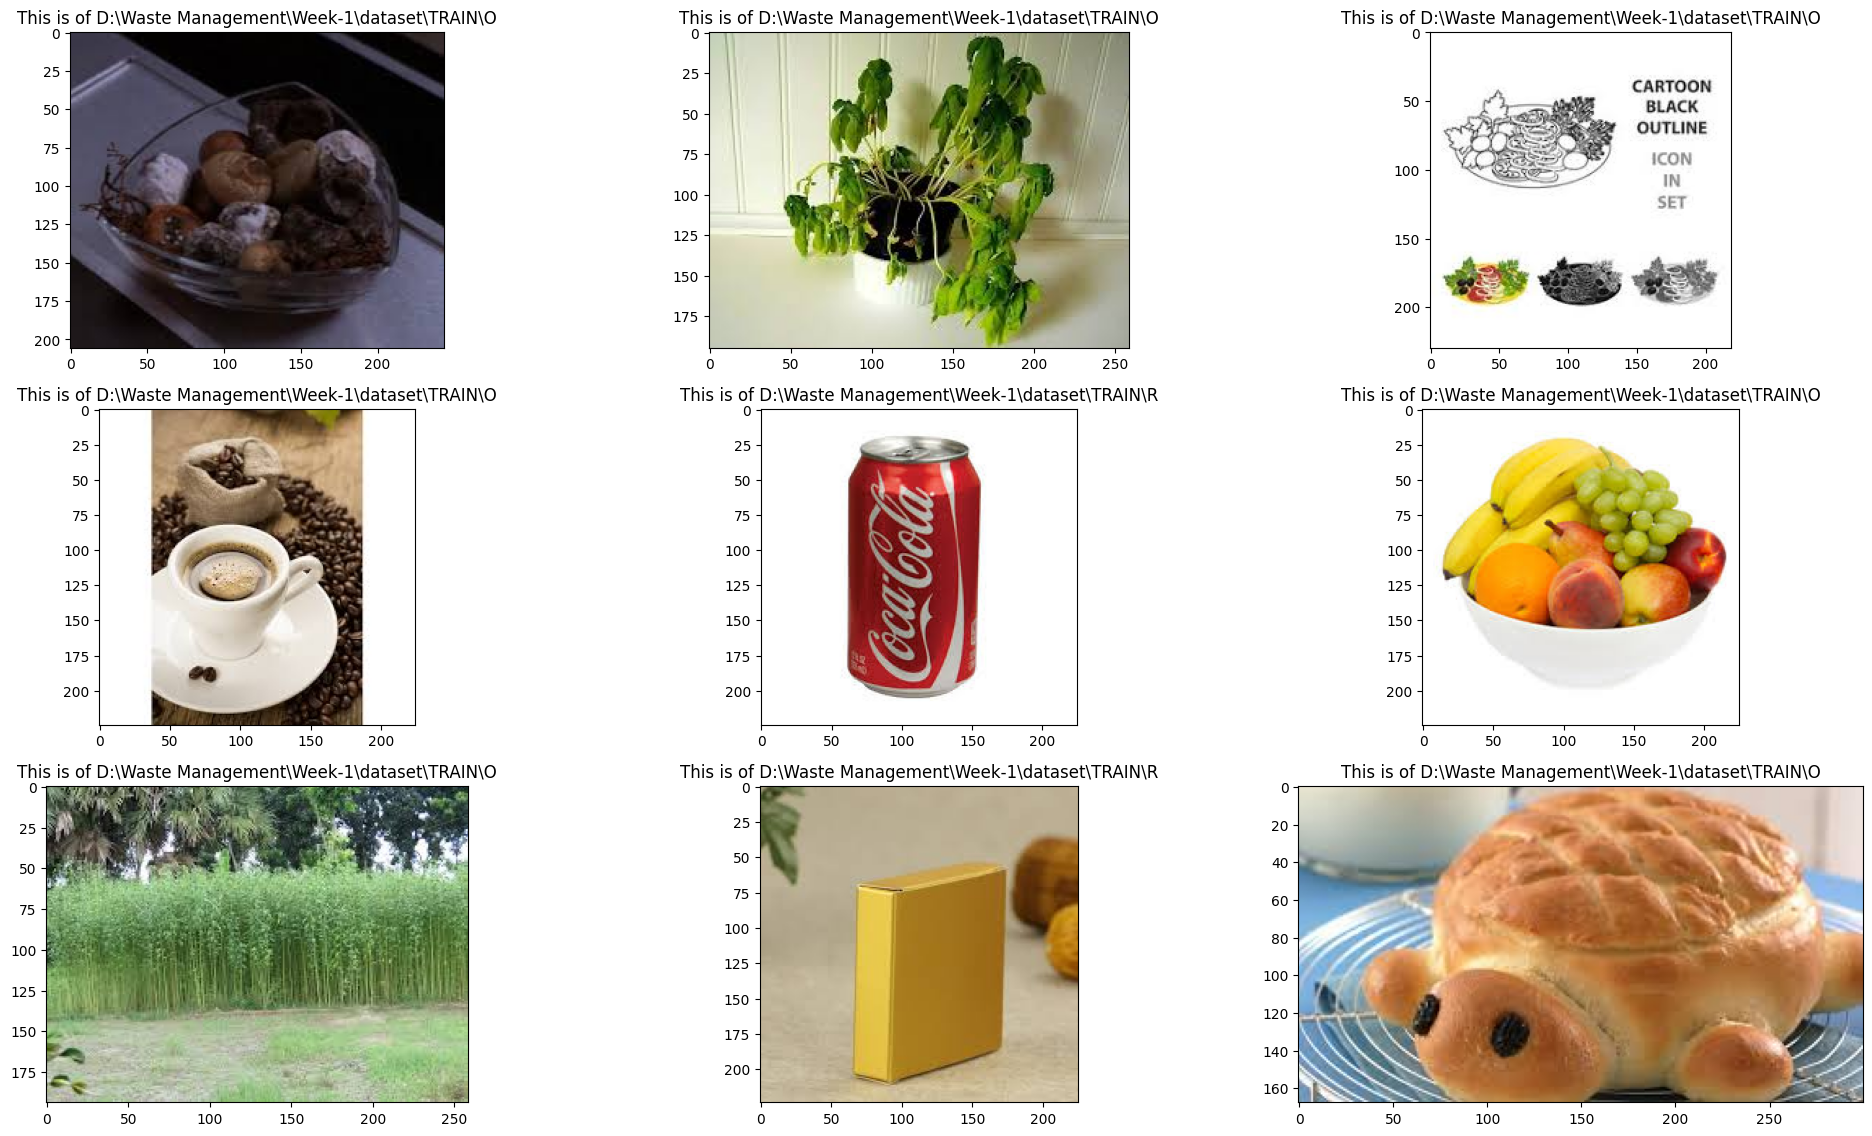

In [14]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3, (i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()
    

## CNN - Convolutional Neural Network

In [21]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 256

In [22]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_22 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [24]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical"
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [26]:
hist = model.fit(
    train_generator,
    epochs = 10,
    validation_data = test_generator
)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 438s 5s/step - accuracy: 0.6826 - loss: 0.8045 - val_accuracy: 0.8739 - val_loss: 0.3728
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 282s 3s/step - accuracy: 0.8202 - loss: 0.4308 - val_accuracy: 0.8957 - val_loss: 0.2822
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 259s 3s/step - accuracy: 0.8432 - loss: 0.3912 - val_accuracy: 0.8930 - val_loss: 0.2840
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 630s 7s/step - accuracy: 0.8519 - loss: 0.3620 - val_accuracy: 0.8683 - val_loss: 0.3174
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 277s 3s/step - accuracy: 0.8644 - loss: 0.3371 - val_accuracy: 0.8918 - val_loss: 0.2809
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 306s 3s/step - accuracy: 0.8763 - loss: 0.3085 - val_accuracy: 0.8663 - val_loss: 0.3540
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 383s 4s/step - accuracy: 0.8838 - loss: 0.2914 - val_accuracy: 0.8874 - val_loss: 0.2935
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 278s 3s/step - accuracy: 0.8960 - loss: 0.2568 - val_accuracy: 0.9005 - v